### TP : Ensemble learning


#### Etudiants

- **Mbathe Mekontchou Paul**
- **Practice Lidao Alouda**


Importation des dépendances


In [111]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#### Question 1


Pour obtenir une prédiction correcte, il faut qu'au moins, la moitié des classificateurs aient une bonne prédiction.

Donc la probabilité d'avoir une prédiction correcte, sachant que le modèle agrégé suit une loi binomiale, est : à $P(X>=k)= \sum_{i=1}^{L}P(X=k)$

où $k$ est le plus petit entier tel que $k>L/2$ d'où $k=⌊L/2⌋+1$, et ⌊𝐿/2⌋ représente la partie entière de 𝐿/2.


In [112]:
p = 0.7
L_values = [1, 5, 10, 50, 100]
probabilities = [1-binom.cdf(L // 2, L, p) for L in L_values]
for L, prob in zip(L_values, probabilities):
    print(f"L = {L}: Probabilité de prédiction correcte = {prob:.6f}")

L = 1: Probabilité de prédiction correcte = 0.700000
L = 5: Probabilité de prédiction correcte = 0.836920
L = 10: Probabilité de prédiction correcte = 0.849732
L = 50: Probabilité de prédiction correcte = 0.997630
L = 100: Probabilité de prédiction correcte = 0.999978


Tracons les probabilités de la classification correct pour chaque nombre de classifieurs 1,2,...,10


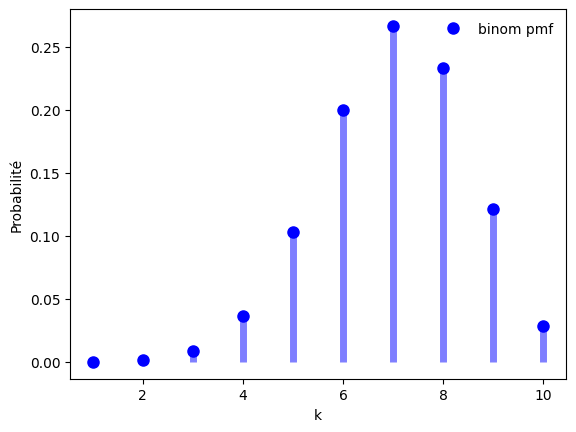

In [113]:
L = 10
rv = binom(L, p)
fig, ax = plt.subplots(1, 1)
x = np.arange(1, 11)
ax.plot(x, rv.pmf(x), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, L, p), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('k')
ax.set_ylabel('Probabilité')
ax.legend(loc='best', frameon=False)

## 1 Bagging


### **Question** 2

Mettons en œuvre le Bagging avec des arbres de régression de profondeur 1 (stumps), puis avec des arbres plus profonds.


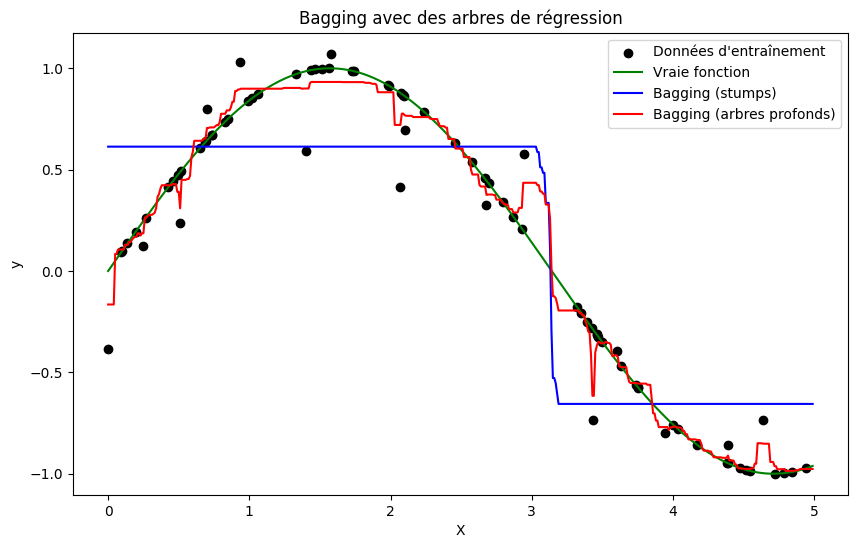

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


stump = DecisionTreeRegressor(max_depth=1, random_state=1)
bagging_stump = BaggingRegressor(stump, n_estimators=50, random_state=1)
bagging_stump.fit(X, y)
y_pred_stump = bagging_stump.predict(X_test)


deep_tree = DecisionTreeRegressor(max_depth=5, random_state=1)
bagging_deep = BaggingRegressor(deep_tree, n_estimators=50, random_state=1)
bagging_deep.fit(X, y)
y_pred_deep = bagging_deep.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="black", label="Données d'entraînement")
plt.plot(X_test, np.sin(X_test).ravel(), label="Vraie fonction", color="green")
plt.plot(X_test, y_pred_stump, label="Bagging (stumps)", color="blue")
plt.plot(X_test, y_pred_deep, label="Bagging (arbres profonds)", color="red")
plt.title("Bagging avec des arbres de régression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### **Question 3**

Illustrons graphiquement le rôle de 𝐿 ainsi que la profondeur des arbres (max_depth) en jouant sur ces deux paramètres. Pour cela, nous allons tracer les courbes avec plusieurs valeurs de 𝐿 et différentes valeurs de profondeur pour voir comment évoluent les prédictions en fonction de ces valeurs.


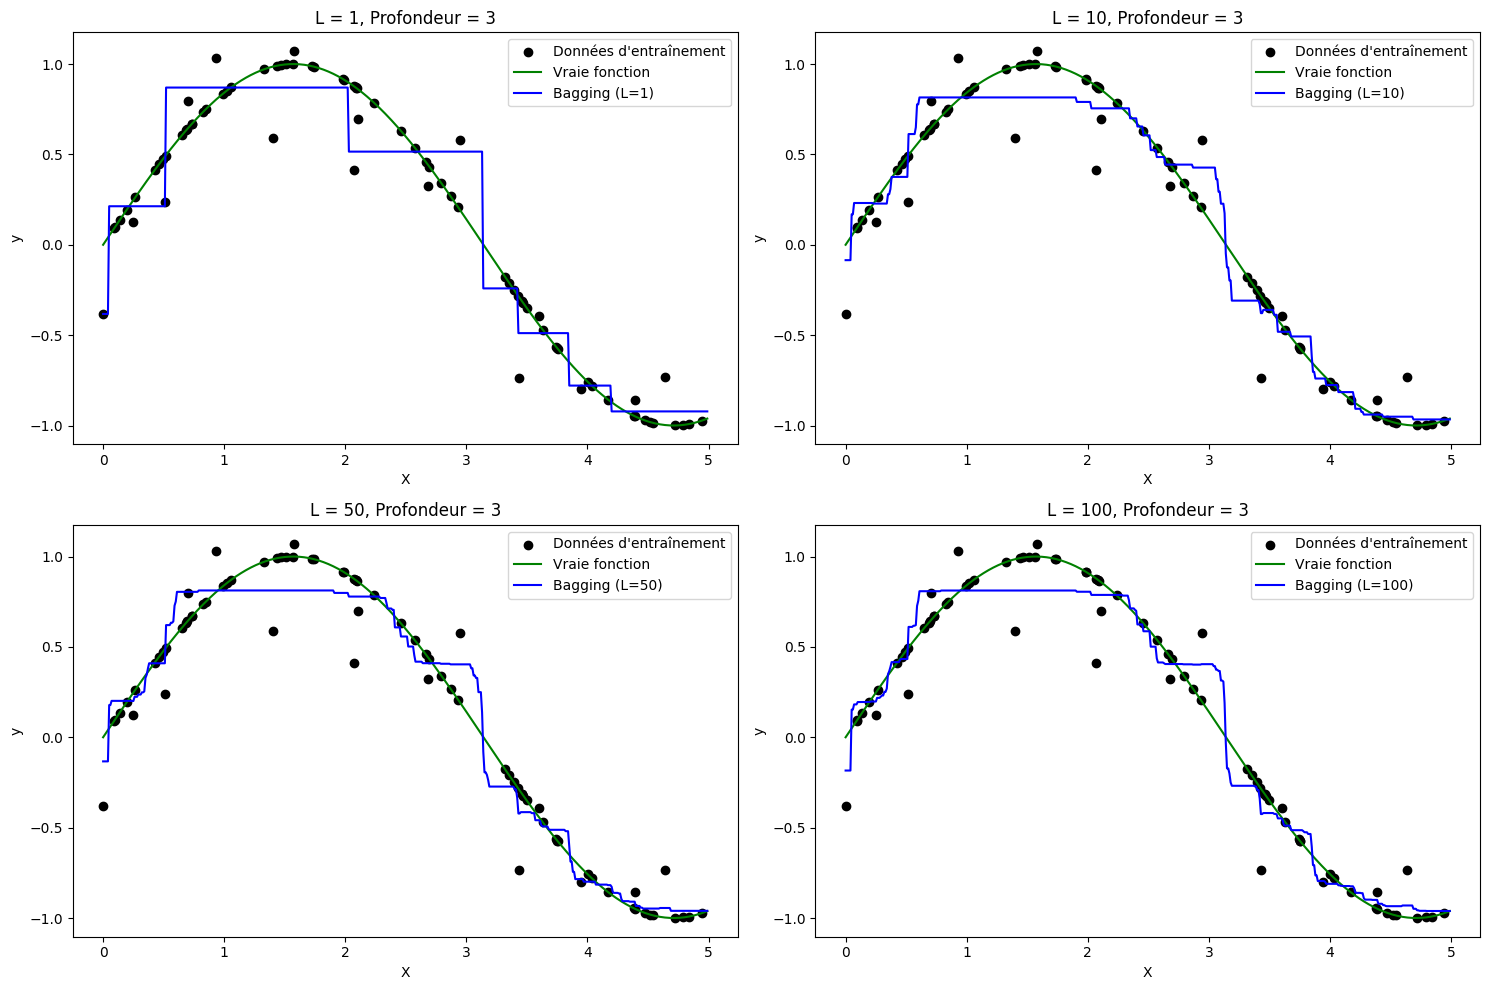

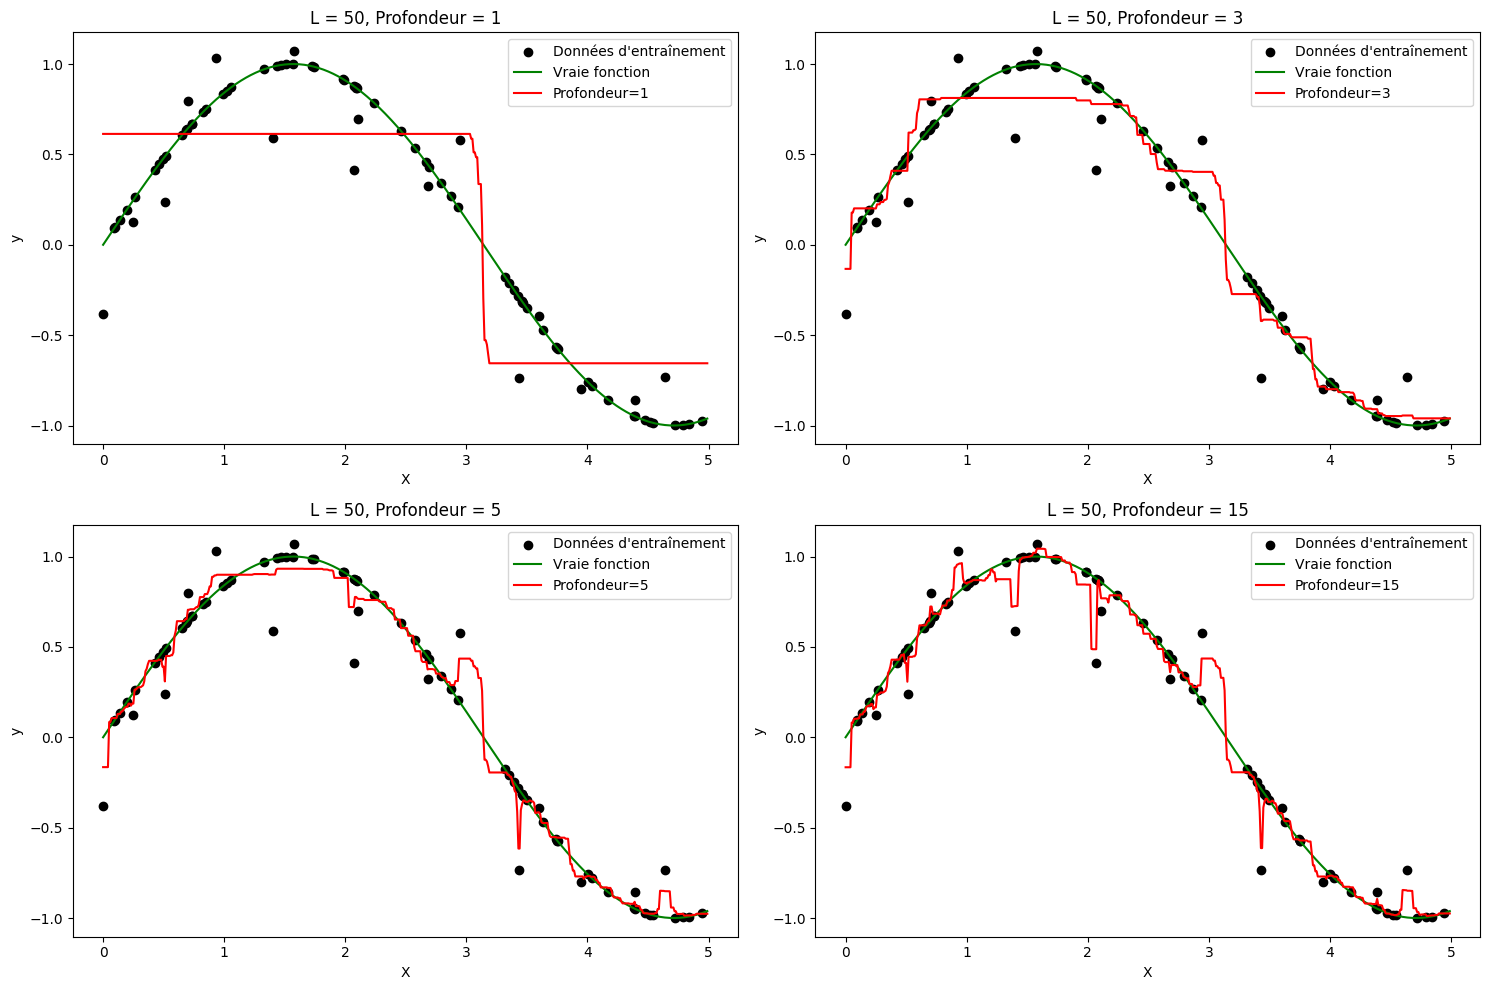

In [115]:
L_values = [1, 10, 50, 100]
max_depth = 3

plt.figure(figsize=(15, 10))
for i, L in enumerate(L_values, 1):
    bagging = BaggingRegressor(DecisionTreeRegressor(max_depth=max_depth, random_state=1),
                               n_estimators=L,
                               random_state=1
                               )
    bagging.fit(X, y)
    y_pred = bagging.predict(X_test)

    plt.subplot(2, 2, i)
    plt.scatter(X, y, c="black", label="Données d'entraînement")
    plt.plot(X_test, np.sin(X_test).ravel(),
             label="Vraie fonction", color="green")
    plt.plot(X_test, y_pred, label=f"Bagging (L={L})", color="blue")
    plt.title(f"L = {L}, Profondeur = {max_depth}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()

depth_values = [1, 3, 5, 15]
L = 50

plt.figure(figsize=(15, 10))
for i, depth in enumerate(depth_values, 1):
    bagging = BaggingRegressor(DecisionTreeRegressor(max_depth=depth, random_state=1),
                               n_estimators=L,
                               random_state=1
                               )
    bagging.fit(X, y)
    y_pred = bagging.predict(X_test)

    plt.subplot(2, 2, i)
    plt.scatter(X, y, c="black", label="Données d'entraînement")
    plt.plot(X_test, np.sin(X_test).ravel(),
             label="Vraie fonction", color="green")
    plt.plot(X_test, y_pred, label=f"Profondeur={depth}", color="red")
    plt.title(f"L = {L}, Profondeur = {depth}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
plt.tight_layout()
plt.show()

### **Question 4**


En comparant les prédictions d'un seul arbre avec celles d'un ensemble d'arbres (bagging). On constatque les arbres de faible profondeur (dans notre figure max_depth=1) sont biaisés car ils ne capturent pas bien les détails de la vraie fonction sin(𝑥).

Le Bagging réduit la variance en combinant plusieurs modèles. Cela se voit par des prédictions plus stables et proches de la vraie fonction.

Les arbres de décision ont une variance élevée et un faible biais, surtout lorsqu'ils sont profonds. Le bagging réduit la variance en moyennant les prédictions de plusieurs arbres, ce qui stabilise le modèle.


### **Question 5**


Mettons en évidence le sur-apprentissage


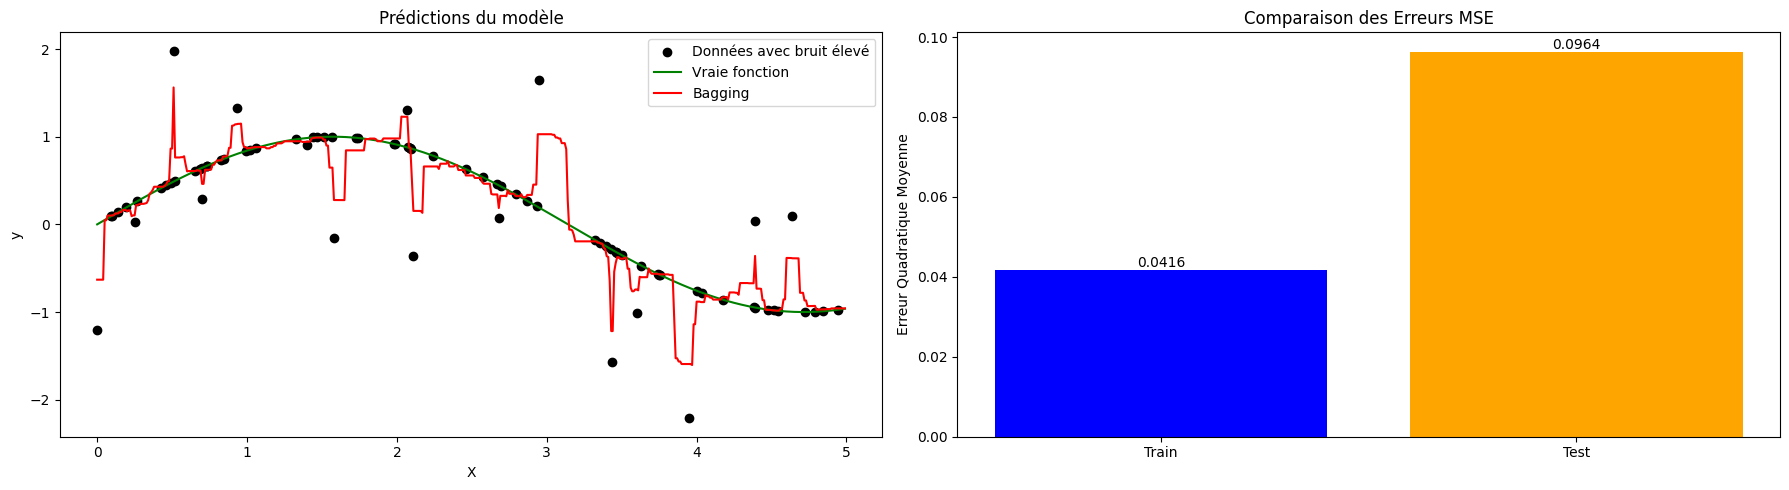

Erreur MSE sur l'ensemble d'entraînement : 0.0416
Erreur MSE sur l'ensemble de test : 0.0964


In [116]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
y_high_noise = np.sin(X).ravel()
y_high_noise[::5] += 3 * (0.5 - rng.rand(16))  # Le bruit est passé de 1 à 3

y_test = np.sin(X_test).ravel()


bagging_high_noise = BaggingRegressor(
    DecisionTreeRegressor(max_depth=10, random_state=1),
    n_estimators=50,
    random_state=1,
    bootstrap=True
)
bagging_high_noise.fit(X, y_high_noise)

y_pred_train = bagging_high_noise.predict(X)
y_pred_high_noise = bagging_high_noise.predict(X_test)


mse_train = mean_squared_error(y_high_noise, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_high_noise)


erreur_test = np.abs(y_test - y_pred_high_noise)
erreur_train = np.abs(y_high_noise - y_pred_train)

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y_high_noise, c="black", label="Données avec bruit élevé")
plt.plot(X_test, np.sin(X_test).ravel(), label="Vraie fonction", color="green")
plt.plot(X_test, y_pred_high_noise, label="Bagging", color="red")
plt.title("Prédictions du modèle")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [mse_train, mse_test], color=['blue', 'orange'])
plt.title('Comparaison des Erreurs MSE')
plt.ylabel('Erreur Quadratique Moyenne')
plt.text(0, mse_train, f'{mse_train:.4f}', ha='center', va='bottom')
plt.text(1, mse_test, f'{mse_test:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Erreur MSE sur l'ensemble d'entraînement : {mse_train:.4f}")
print(f"Erreur MSE sur l'ensemble de test : {mse_test:.4f}")

**Nous constatons visuelement que** :

1. L'erreur d'entraînement est très faible car le modèle mémorise les données d'origine et essaye de donner des bonnes predictions même aux valeurs abérantes
2. L'erreur de test est significativement plus élevée ce qui traduit le fait que le modèle ne généralise pas bien

_Les indices de sur-apprentissage sont :_

1. Un écart important entre les erreurs de train et de test
2. Une prédiction qui suit précisément les points bruités plutôt que la tendance générale


### **Question 6**

Pour montrer que l’on peut réduire ce phénomène en sous-échantillonnant aléatoirement (sans remise) au lieu de prendre des échantillons bootstrap, nous allons utiliser la classe BaggingRegressor avec le paramètre **bootstrap**=True et **max_sample** = 0.5


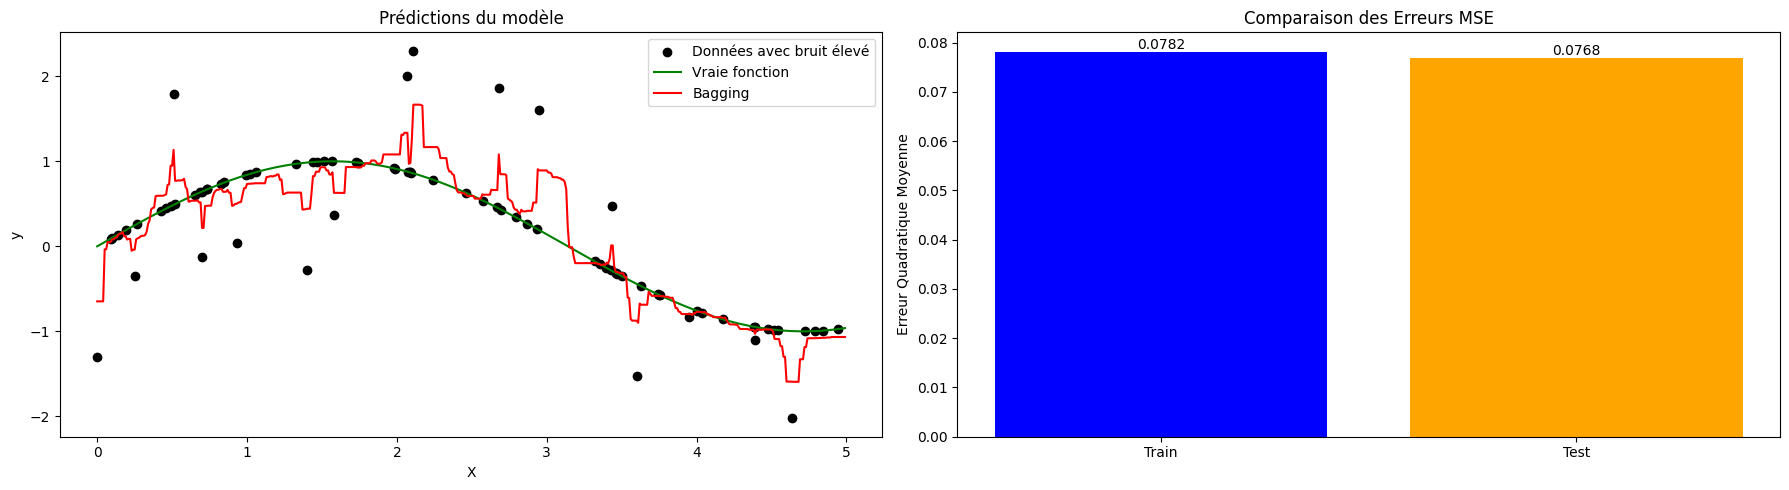

Erreur MSE sur l'ensemble d'entraînement : 0.0782
Erreur MSE sur l'ensemble de test : 0.0768


In [117]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
y_high_noise = np.sin(X).ravel()
y_high_noise[::5] += 3 * (0.5 - rng.rand(16))  # Le bruit est passé de 1 à 3

y_test = np.sin(X_test).ravel()


# Initialisation et entraînement du modèle Bagging
bagging_high_noise = BaggingRegressor(
    DecisionTreeRegressor(max_depth=10, random_state=1),
    n_estimators=50,
    random_state=1,
    max_samples=0.5,
    bootstrap=False
)
bagging_high_noise.fit(X, y_high_noise)


y_pred_train = bagging_high_noise.predict(X)
y_pred_high_noise = bagging_high_noise.predict(X_test)


mse_train = mean_squared_error(y_high_noise, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_high_noise)


erreur_test = np.abs(y_test - y_pred_high_noise)
erreur_train = np.abs(y_high_noise - y_pred_train)

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y_high_noise, c="black", label="Données avec bruit élevé")
plt.plot(X_test, np.sin(X_test).ravel(), label="Vraie fonction", color="green")
plt.plot(X_test, y_pred_high_noise, label="Bagging", color="red")
plt.title("Prédictions du modèle")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [mse_train, mse_test], color=['blue', 'orange'])
plt.title('Comparaison des Erreurs MSE')
plt.ylabel('Erreur Quadratique Moyenne')
plt.text(0, mse_train, f'{mse_train:.4f}', ha='center', va='bottom')
plt.text(1, mse_test, f'{mse_test:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print(f"Erreur MSE sur l'ensemble d'entraînement : {mse_train:.4f}")
print(f"Erreur MSE sur l'ensemble de test : {mse_test:.4f}")

## 3. Random Forest


### **Question 7**

Évaluons le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez les performances avec celles d'un SVM linéaire.

**NB** : le dataset boston n'est plus disponibles sur scikit-learn, nos évaluations ont été fait sans ce jeu de données


In [118]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC  # On importe SVR au lieu de LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes, load_iris, load_digits

# Charger les datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Random Forest
rf_regressor = RandomForestRegressor(random_state=1)
rf_classifier = RandomForestClassifier(random_state=1)


svm_regressor = SVR(kernel='linear')
svm_classifier = SVC(kernel='linear')


datasets = [diabetes, iris, digits]
dataset_names = ['diabetes', 'iris', 'digits']

models = [rf_regressor, rf_classifier, rf_classifier]
svm_models = [svm_regressor, svm_classifier, svm_classifier]

for i, dataset in enumerate(datasets):
    X, y = dataset.data, dataset.target
    rf_score = cross_val_score(models[i], X, y, cv=7).mean()
    svm_score = cross_val_score(svm_models[i], X, y, cv=7).mean()
    print(f"Dataset: {dataset_names[i]}, RF Score: {
          rf_score}, SVM Score: {svm_score}")

Dataset: diabetes, RF Score: 0.4037127878132223, SVM Score: -0.028076491361505935
Dataset: iris, RF Score: 0.953308596165739, SVM Score: 0.9734075448361164
Dataset: digits, RF Score: 0.9348791863535297, SVM Score: 0.9499157518065592


#### Commentaire :

Forêt aléatoire et SVM linéaire: Sur ces ensembles de données de classification, les deux modèles obtiennent de bons scores (au dessus de 0.9). Le SVM linéaire a légèrement surpassé la forêt aléatoire sur les deux ensembles de données (Iris : 0.97 contre 0.95 ; Digits : 0.95 contre 0.93).

- La performance du modèle dépend fortement de la nature des données. Pour les ensembles de données non-linéaires, une forêt aléatoire pourrait potentiellement obtenir de meilleurs résultats qu'un SVM linéaire


### **Question 8**.

Affichons de la probabilité de prédiction des classes sur le dataset iris restreint aux deux premières variables explicatives


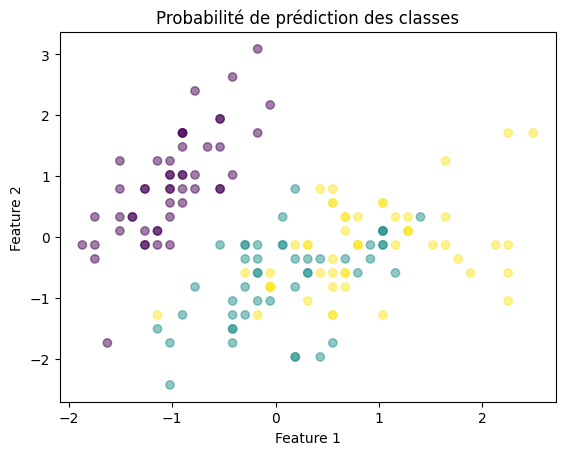

In [119]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target

X = scale(X_unscaled)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

proba = rf_classifier.predict_proba(X)


plt.scatter(X[:, 0], X[:, 1], c=proba.argmax(
    axis=1), cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Probabilité de prédiction des classes')
plt.show()

#### **Question 9**.

Comparaison des scores par 6-fold cross-validation des Random Forests et des arbres de décisions pures sur le dataset digits


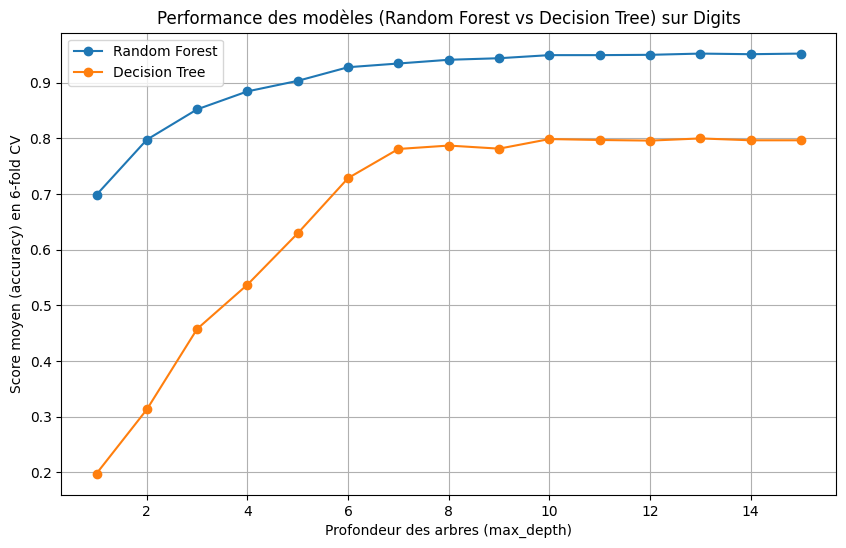

In [120]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

max_depths = np.arange(1, 16)

rf_scores = []
dt_scores = []


for max_depth in max_depths:

    rf = RandomForestClassifier(
        n_estimators=100, max_depth=max_depth, random_state=42)
    rf_score = cross_val_score(rf, X, y, cv=6, scoring='accuracy').mean()
    rf_scores.append(rf_score)

    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_score = cross_val_score(dt, X, y, cv=6, scoring='accuracy').mean()
    dt_scores.append(dt_score)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, rf_scores, label='Random Forest', marker='o')
plt.plot(max_depths, dt_scores, label='Decision Tree', marker='o')
plt.title("Performance des modèles (Random Forest vs Decision Tree) sur Digits")
plt.xlabel('Profondeur des arbres (max_depth)')
plt.ylabel('Score moyen (accuracy) en 6-fold CV')
plt.legend()
plt.grid(True)
plt.show()

## 3 Boosting


### **Question 10**

**Démonstration que le minimiseur de la fonction $f : \mathbb{R} \to \mathbb{R}_{exp}(f) = \mathbb{E}\left[\exp\left(-Y f(x)\right)\right]$ est $f_{\text{exp}}^* = \frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right).$**

Pour cela, nous devons minimiser l'espérance de la fonction exponentielle de la perte donnée par : $ R\_{\text{exp}}(f) = \mathbb{E}\left[\exp(-Yf(X))\right].$

En utilisant l'espérance conditionnelle, nous avons :

$$
R_{\text{exp}}(f) = \mathbb{E}\left[\mathbb{E}\left[\exp(-Yf(X)) \mid X\right]\right].
$$

D'après la loi de probabilité totale, nous obtenons :

$$
\mathbb{E}\left[\exp(-Yf(X)) \mid X\right] = \eta(X) \exp(-f(X)) + (1 - \eta(X)) \exp(f(X)).
$$

Minimisons cette expression par rapport à $f(X)$. Pour cela, dérivons cette expression rapport à $f(X)$ et nous la mettons à zéro :

$$
\frac{\partial}{\partial f(X)}\left(\eta(X) \exp(-f(X)) + (1 - \eta(X)) \exp(f(X))\right) = 0.
$$

d'où :

$$
-\eta(X) \exp(-f(X)) + (1 - \eta(X)) \exp(f(X)) = 0.
$$

La résolution de cette équation donne :

$$
\eta(X) \exp(-f(X)) = (1 - \eta(X)) \exp(f(X)).
$$

Nous pouvons réarranger cette équation pour obtenir :

$$
\frac{\eta(X)}{1 - \eta(X)} = \exp(2f(X)).
$$

En prenant le logarithme des deux côtés, nous obtenons :

$$
f(X) = \frac{1}{2} \log\left(\frac{\eta(X)}{1 - \eta(X)}\right).
$$

Ainsi, le minimiseur de la fonction $R\_{\text{exp}}(f)$ est atteint en

$$
f_{\text{exp}}^* = \frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right).
$$

---


### **Question 11**

**Déduisons que le classifieur de Bayes associé au risque $R_{\exp}$ est le même que celui associé au risque 0/1, $R_{\phi_0}.$**

Le classifieur de Bayes pour le risque 0/1 est donné par :

$$
h_{\varphi_0}^* = \text{sign}(2\eta(x) - 1).
$$

D'après la question précedente, pour le risque exponentiel, nous avons trouvé que le minimiseur est :

$$
f_{\text{exp}}^* = \frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right).
$$

Le classifieur associé est donc :

$$
h_{\text{exp}}^* = \text{sign}(f_{\text{exp}}^*(x)) = \text{sign}\left(\frac{1}{2} \log\left(\frac{\eta(x)}{1 - \eta(x)}\right)\right) = \text{sign}\left(\log\left(\frac{\eta(x)}{1 - \eta(x)}\right)\right).
$$

Puisque

$$
\log\left(\frac{\eta(x)}{1 - \eta(x)}\right) > 0 \text{  alors  }  \frac{\eta(x)}{1 - \eta(x)} > 1 \iff 2\eta(x) - 1 > 0
$$

Nous avons donc :

$$
h_{\text{exp}}^* = \text{sign}(2\eta(x) - 1).
$$

Ainsi, le classifieur de Bayes associé au risque $R_{\text{exp}}$ est le même que celui associé au risque 0/1, $R_{\varphi_0}$.


---

### **Question 12**

**Montrons que la solution du programme d'optimisation est : $c_m = \frac{1}{2} \log\left(\frac{P_{w_{m-1}}(Y = \hat{h}_m(X))}{P_{w_{m-1}}(Y \neq \hat{h}_m(X))}\right).$**

1. Le programme d'optimisation à résoudre est :

   $$
   c^*_m = \arg\min_c \mathbb{E}_{\omega^{m-1}}\left[\exp(-c \cdot Y \cdot \hat{h}_m(X))\right].
   $$

2. En remplaçant l'espérance par sa forme discrète (pondérée par $w^{m-1}$) :

   $$
   c^*_m = \arg\min_c \sum_{i=1}^n w^{m-1}_i \exp(-c \cdot Y_i \cdot \hat{h}_m(X_i)).
   $$

3. Dérivons par rapport à $c$ :

   $$
   \frac{\partial}{\partial c} \sum_{i=1}^n w^{m-1}_i \exp(-c \cdot Y_i \cdot \hat{h}_m(X_i)) = \sum_{i=1}^n w^{m-1}_i \left[-Y_i \cdot \hat{h}_m(X_i) \cdot \exp(-c \cdot Y_i \cdot \hat{h}_m(X_i))\right].
   $$

4. Pour trouver $c^*_m$ il nous suffit de trouver la valeur de c qui annule cette dérivée, c'est à dire :

   $$
   \sum_{i=1}^n w^{m-1}_i \left[-Y_i \cdot \hat{h}_m(X_i) \cdot \exp(-c \cdot Y_i \cdot \hat{h}_m(X_i))\right] = 0
   $$

5. En regroupant les termes pour lesquels $Y_i = \hat{h}_m(X_i)$ et $Y_i \neq \hat{h}_m(X_i) \iff$ $Y_i \cdot \hat{h}_m(X_i)= 1$ et $Y_i \cdot \hat{h}_m(X_i)=-1$ Nous obtenons

   $$
   - \sum_{i=1}^n w^{m-1}_i 1_{Y_i \neq \hat{h}_m(X_i)} \cdot \exp(c)  + \sum_{i=1}^n w^{m-1}_i 1_{Y_i = \hat{h}_m(X_i)} \cdot \exp(-c) = 0 \iff

   \exp(-c) \cdot P_{w^{m-1}}(Y = \hat{h}_m(X)) = \exp(c) \cdot P_{w^{m-1}}(Y \neq \hat{h}_m(X)).
   $$

6. En prenant le logarithme nous obtenons bien :

   $$
   c_m = \frac{1}{2} \log\left(\frac{P_{w^{m-1}}(Y = \hat{h}_m(X))}{P_{w^{m-1}}(Y \neq \hat{h}_m(X))}\right).
   $$


### **Question 13**

**Démonstration que les poids : $\omega_i^m \propto \omega_i^{m-1} \cdot \exp\left(-c_m^* \cdot Y_i \cdot \hat{h}_m(X_i)\right)$ et $w_i^m \propto w_i^{m-1} \cdot \exp\left(2 \cdot c_m \cdot \mathbf{1}\{Y_i \neq \hat{h}_m(X_i)\}\right)$ sont identiques.**

1. Les poids $\omega^m_i$ sont donnés par : $\omega^m_i \propto \omega^{m-1}_i \cdot \exp(-c^*_m \cdot Y_i \cdot \hat{h}_m(X_i))$

2. Les poids $w^m_i$ sont donnés dans l'algorithme **AdaBoost** par : $w^m_i \propto w^{m-1}_i \cdot \exp(2 \cdot c_m \cdot 1_{\{Y_i \neq \hat{h}_m(X_i)\}})$

3. Exprimons l'expression $1_{Y_i \neq \hat{h}_m(X_i)}$ en fonction de $Y_i \cdot \hat{h}_m(X_i)$ :

   $$
   1_{\{Y_i \neq \hat{h}_m(X_i)\}} = 1 - \frac{1}{2}(1 + Y_i \cdot \hat{h}_m(X_i)).
   $$

4. En insérant cette expression dans $w^m_i$ nous optenons :

   $$
   w^m_i \propto w^{m-1}_i \cdot \exp\Big(2 \cdot c_m \cdot \Big[1 - \frac{1}{2}(1 + Y_i \cdot \hat{h}_m(X_i))\Big]\Big).
   $$

5. Après simplification :

   $$
   w^m_i \propto w^{m-1}_i \cdot \exp(2 \cdot c_m) \cdot \exp(-c_m \cdot Y_i \cdot \hat{h}_m(X_i)).
   $$

6. Puisque le facteur $\exp(2 \cdot c_m)$ est constant pour tous les $i$, il disparaît après normalisation :

   $$
   w^m_i \propto w^{m-1}_i \cdot \exp(-c_m \cdot Y_i \cdot \hat{h}_m(X_i)).
   $$

7. Comme $c^*_m = c_m$, on a :
   $$
   \omega^m_i \propto \omega^{m-1}_i \cdot \exp(-c_m \cdot Y_i \cdot \hat{h}_m(X_i)).
   $$

Ainsi, les deux formulations des poids sont identiques.


### Question 14

Mettons en œuvre **AdaBoost** avec des arbres de profondeur 1, puis 2, puis 10,


In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

digits = load_digits()
X, y = digits.data, digits.target

y_binary = (y == 0).astype(int)  # Classe 0 contre le reste

depths = [1, 2, 10]
for depth in depths:
    base_estimator = DecisionTreeClassifier(max_depth=depth)
    model = AdaBoostClassifier(base_estimator, n_estimators=50)
    scores = cross_val_score(model, X, y_binary, cv=6)
    print(f"Profondeur {depth} : Précision moyenne = {scores.mean():.4f}")

Profondeur 1 : Précision moyenne = 0.9983
Profondeur 2 : Précision moyenne = 0.9967
Profondeur 10 : Précision moyenne = 0.9861


### **Question 15**


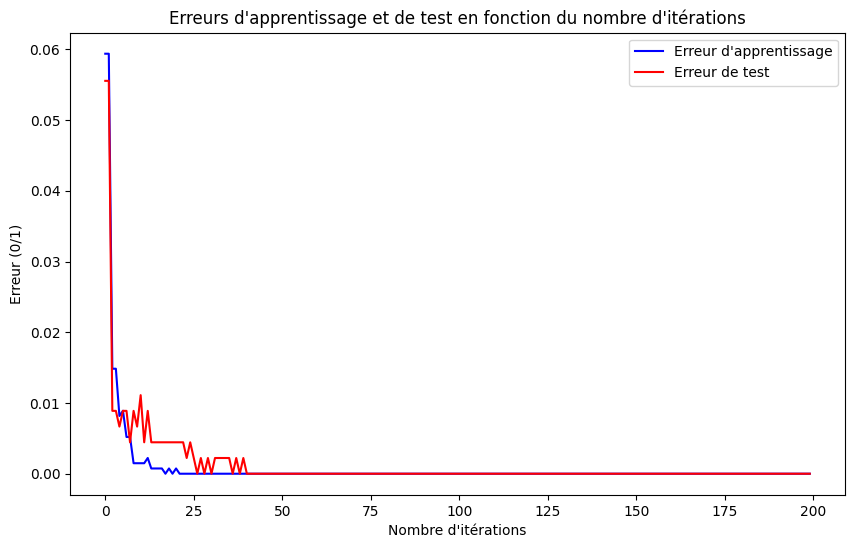

In [124]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.25, random_state=42)

model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200)
model.fit(X_train, y_train)

train_errors = []
test_errors = []

for y_pred_train, y_pred_test in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_errors.append((y_pred_train != y_train).mean())
    test_errors.append((y_pred_test != y_test).mean())

# Tracé des erreurs
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Erreur d'apprentissage", color="blue")
plt.plot(test_errors, label="Erreur de test", color="red")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Erreur (0/1)")
plt.legend()
plt.title("Erreurs d'apprentissage et de test en fonction du nombre d'itérations")
plt.show()

### Question 16

On remarque que lorsque la profondeur des arbres est faible (par exemple 1 ou 2), AdaBoost tend à bien généraliser, avec des erreurs d’apprentissage et de test qui diminuent au fil des itérations.

Avec des arbres profonds (par exemple 10), le modèle devient plus complexe, ce qui entraine un surapprentissage. L’erreur d’apprentissage continue de diminuer, mais l’erreur de test peut augmenter après un certain nombre d’itérations.


### Question 17


In [123]:
import numpy as np


class AdaBoost:
    def __init__(self, base_estimator, n_estimators):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples = len(y)
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            model = self.base_estimator
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)

            # Calcul de l'erreur pondérée
            err = np.sum(w * (y_pred != y)) / np.sum(w)

            # Calcul du coefficient alpha
            alpha = 0.5 * np.log((1 - err) / max(err, 1e-10))
            self.alphas.append(alpha)
            self.models.append(model)

            # Mise à jour des poids
            w = w * np.exp(-alpha * y * y_pred)
            w /= np.sum(w)

    def predict(self, X):
        final_pred = np.zeros(X.shape[0])
        for alpha, model in zip(self.alphas, self.models):
            final_pred += alpha * model.predict(X)
        return np.sign(final_pred)